In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import pandas as pd
import statsmodels.api as sm
import matplotlib

from pmdarima import auto_arima
import pmdarima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
 
from itertools import product
#from tqdm import tqdm_notebook

import Model_Evaluation as me

In [2]:
#books = pd.read_csv('/Users/rahulnair/Desktop/Labelmaster_/Sales_Data/Books_ext_fs.csv')
#books = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LabelMaster/LabelMaster Data/Books_ext.csv')
#books = pd.read_csv('C:/Users/11602/OneDrive/Practicum/LabelMaster_Sales_Forecasting/data/Books_ext_fs.csv')
#packaging = pd.read_csv('C:/Users/11602/OneDrive/Practicum/LabelMaster_Sales_Forecasting/data/Packaging_ext_fs.csv')
packaging = pd.read_csv('pack_ext_fs_13.csv')
packaging['Year_Month'] = pd.to_datetime(packaging['Year_Month'])
packaging.set_index('Year_Month', inplace = True)
packaging.index = pd.DatetimeIndex(packaging.index.values,
                               freq=packaging.index.inferred_freq)
packaging

,Sum of Sales,"Food & Kindred Products (000s, SA)_freight_m_trucking",Super Long-Haul (550+ mi)_freight_m_trucking,Change in Total Transp. Emp. (000's)_driver_indicators_m_trucking,"Total Class 8, North America_Retail Sales (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Trailers, U.S._Production_M/M % Change_indicators_m_trucking_trailer","Total Classes 4-7, North America_Inventories (Ward's)_M/M % Change_indicators_m_trucking_trailer",FTR Truck Loadings_M/M % Change_freight_m_trucking_trailer,FTR Rail Intermodal Loadings_M/M % Change_freight_m_trucking_trailer,"FTR Rail Carloadings (carload + intermodal) (000s, SA)_freight_m_trucking_trailer",FTR Rail Carloadings_M/M % Change_freight_m_trucking_trailer,FTR Cl. 8 Truck Tonnage_M/M % Change_freight_m_trucking_trailer,Change in Distillate Fuel Inventories_x
2008-01-01,381696.51,7126.929795,6351.102588,2.0,17.711599,-10.826287,-5.728404,-2.749882,-1.855190,3093.638815,1.794564,-3.537698,-2981.0
2008-02-01,430305.85,7090.093356,6306.556660,4.0,-21.096509,-16.623657,2.197078,0.590421,1.841867,3167.478461,2.386822,0.994483,-13327.0
2008-03-01,451627.81,7130.846968,6261.756219,0.0,12.451390,-6.406104,-6.795043,0.963854,0.682647,3164.474988,-0.094822,1.500016,-9852.0
2008-04-01,467417.48,7139.440571,6271.352278,5.0,-9.859063,-20.856725,-3.430210,-0.014003,-2.911224,2955.033944,-6.618508,-0.384513,-733.0
2008-05-01,462676.37,7179.943436,6275.163788,-12.0,3.365907,14.177437,5.186474,-0.794587,3.273510,3059.748460,3.543598,-0.798424,6890.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-01,456579.51,9375.896057,6240.013431,48.0,-25.612015,-33.586799,-12.877938,-11.868303,-12.597259,2202.067829,-14.351778,-8.401269,2134.0
2020-08-01,318564.72,9520.297567,6312.982923,85.0,-20.398412,13.435626,-7.676672,3.278161,4.534112,2185.585205,-0.748507,0.733856,1353.0
2020-09-01,980476.36,9472.590699,6258.050709,44.0,46.491376,17.536391,3.496257,5.879324,10.985691,2400.291965,9.823765,1.478794,-7196.0
2020-10-01,922901.36,9565.479621,6333.545023,62.0,6.538928,-11.888071,1.187032,2.427460,6.261749,2619.082565,9.115166,3.304924,-10130.4


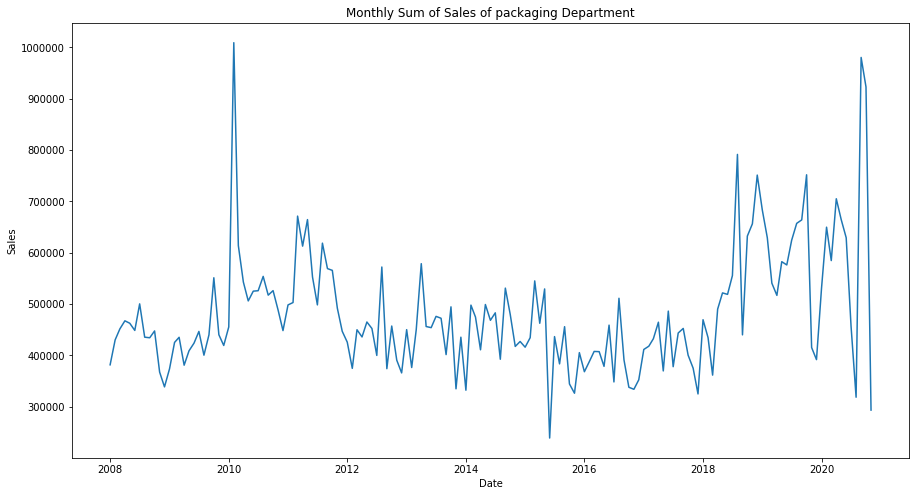

In [3]:
plt.figure(figsize=[15,8])
plt.plot(packaging['Sum of Sales'])
plt.title('Monthly Sum of Sales of packaging Department')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

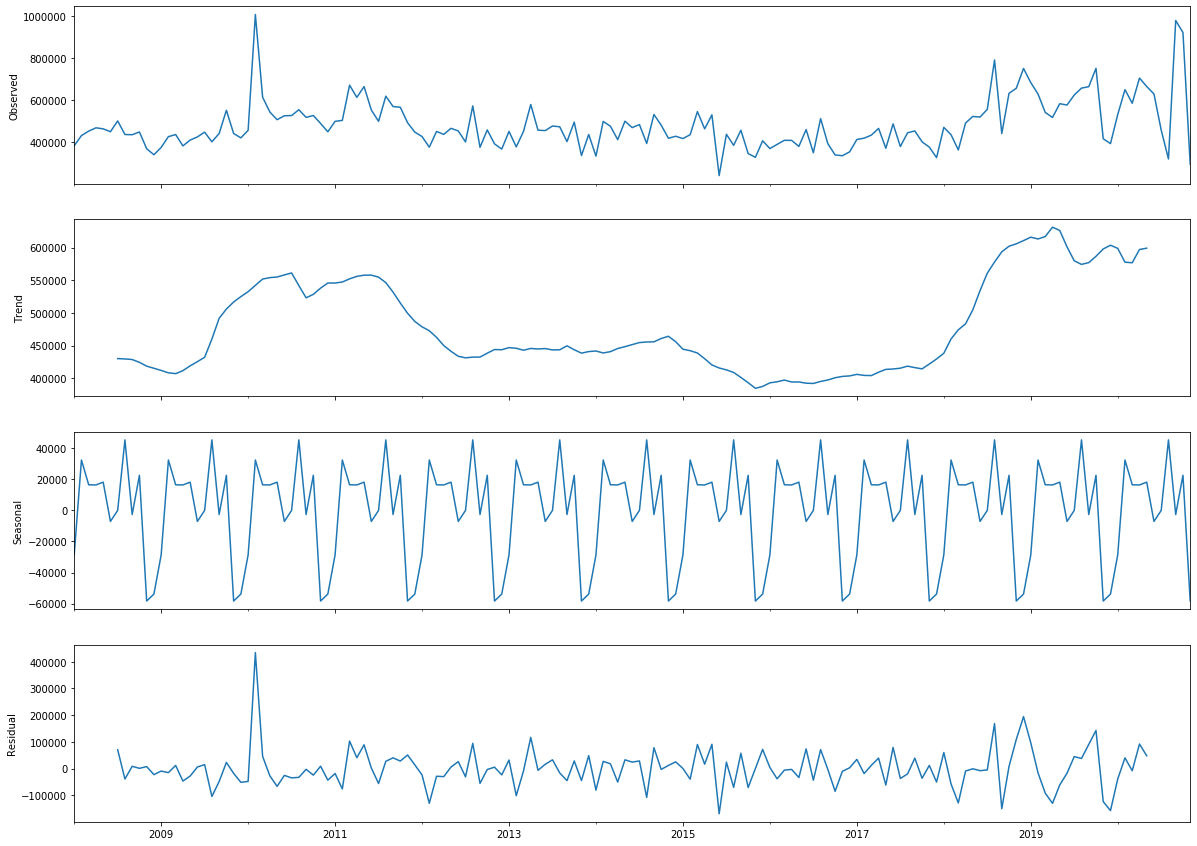

In [4]:
from pylab import rcParams

rcParams['figure.figsize'] = 20,15
decomposition = sm.tsa.seasonal_decompose(packaging['Sum of Sales'], model='additive')
fig, axes = plt.subplots(4, 1, sharex=True)
decomposition.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed')
decomposition.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')
decomposition.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
decomposition.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residual')
plt.show()

In [5]:
packaging = packaging.dropna(axis = 1)
sales = packaging['Sum of Sales']
exog = packaging.iloc[:,2:]
exog

,Super Long-Haul (550+ mi)_freight_m_trucking,Change in Total Transp. Emp. (000's)_driver_indicators_m_trucking,"Total Class 8, North America_Retail Sales (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Trailers, U.S._Production_M/M % Change_indicators_m_trucking_trailer","Total Classes 4-7, North America_Inventories (Ward's)_M/M % Change_indicators_m_trucking_trailer",FTR Truck Loadings_M/M % Change_freight_m_trucking_trailer,FTR Rail Intermodal Loadings_M/M % Change_freight_m_trucking_trailer,"FTR Rail Carloadings (carload + intermodal) (000s, SA)_freight_m_trucking_trailer",FTR Rail Carloadings_M/M % Change_freight_m_trucking_trailer,FTR Cl. 8 Truck Tonnage_M/M % Change_freight_m_trucking_trailer,Change in Distillate Fuel Inventories_x
2008-01-01,6351.102588,2.0,17.711599,-10.826287,-5.728404,-2.749882,-1.855190,3093.638815,1.794564,-3.537698,-2981.0
2008-02-01,6306.556660,4.0,-21.096509,-16.623657,2.197078,0.590421,1.841867,3167.478461,2.386822,0.994483,-13327.0
2008-03-01,6261.756219,0.0,12.451390,-6.406104,-6.795043,0.963854,0.682647,3164.474988,-0.094822,1.500016,-9852.0
2008-04-01,6271.352278,5.0,-9.859063,-20.856725,-3.430210,-0.014003,-2.911224,2955.033944,-6.618508,-0.384513,-733.0
2008-05-01,6275.163788,-12.0,3.365907,14.177437,5.186474,-0.794587,3.273510,3059.748460,3.543598,-0.798424,6890.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-01,6240.013431,48.0,-25.612015,-33.586799,-12.877938,-11.868303,-12.597259,2202.067829,-14.351778,-8.401269,2134.0
2020-08-01,6312.982923,85.0,-20.398412,13.435626,-7.676672,3.278161,4.534112,2185.585205,-0.748507,0.733856,1353.0
2020-09-01,6258.050709,44.0,46.491376,17.536391,3.496257,5.879324,10.985691,2400.291965,9.823765,1.478794,-7196.0
2020-10-01,6333.545023,62.0,6.538928,-11.888071,1.187032,2.427460,6.261749,2619.082565,9.115166,3.304924,-10130.4


In [6]:
ytrain,ytest,Xtrain,Xtest = train_test_split(sales,exog, test_size=0.15, random_state=60616, shuffle=False)
Xtest.shape

(24, 11)

## ARIMA without exogenous dataset

In [7]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
df = pd.DataFrame()

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ytrain,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            combo = [(param,param_seasonal,results.aic)]
            df = df.append(combo)
        except:
            continue
            


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3766.4398959515784
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3347.934489522581
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3101.03846072483
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2796.8075412770086
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3127.379814757024
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3120.1467391297406
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2812.2185239559994
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2793.178431686604
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3658.5398420956894
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3303.522197417249
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3071.060761384666
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2733.5602541069056
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3340.273221698168
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3286.031181228252
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2807.283692257115
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2735.5595099182806
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:3352.3295960002697
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3055.181678681127
ARI

In [9]:
df.columns=['param','param_seasonal','AIC']
df.sort_values('AIC').reset_index(drop=True)

,param,param_seasonal,AIC
0,"(0, 1, 1)","(0, 1, 1, 12)",2682.811668
1,"(1, 1, 1)","(0, 1, 1, 12)",2683.177582
2,"(0, 1, 1)","(1, 1, 1, 12)",2684.777846
3,"(1, 1, 1)","(1, 1, 1, 12)",2685.156219
4,"(1, 0, 1)","(0, 1, 1, 12)",2702.026665
...,...,...,...
59,"(0, 0, 0)","(0, 0, 1, 12)",3347.934490
60,"(0, 1, 0)","(0, 0, 0, 12)",3352.329596
61,"(1, 0, 0)","(0, 0, 0, 12)",3378.434695
62,"(0, 0, 1)","(0, 0, 0, 12)",3658.539842


In [10]:
mod = sm.tsa.statespace.SARIMAX(ytrain,
                                            order=(0,1,1),
                                            seasonal_order=(0,1,1,12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
results = mod.fit()

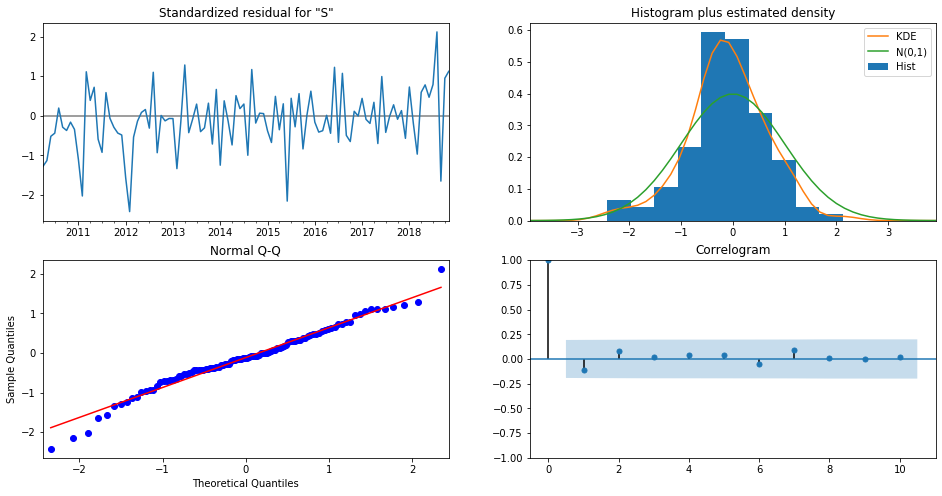

In [11]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

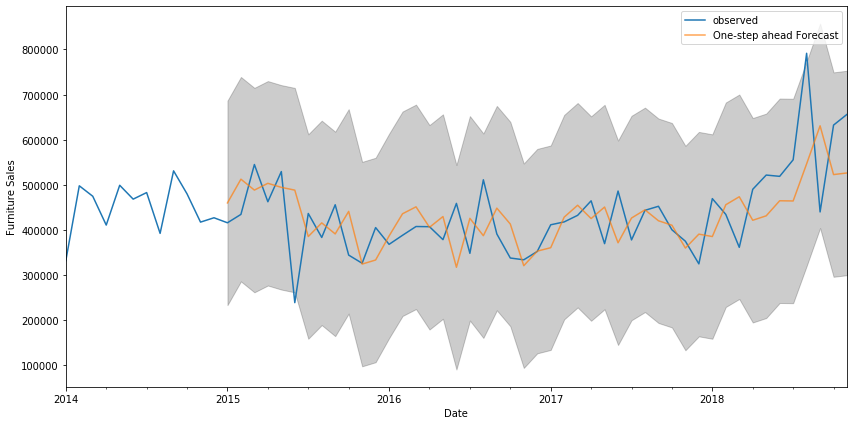

In [12]:
pred = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = ytrain['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

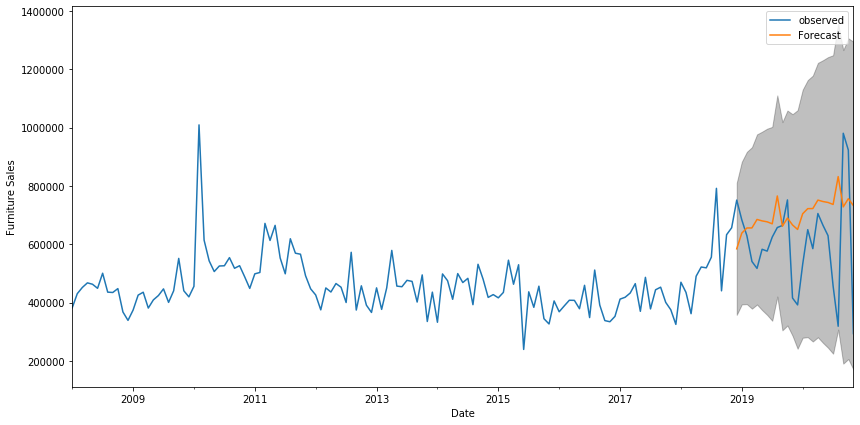

In [13]:
pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()
ax = sales.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [28]:
# For training data
me.evaluate_model(pred.predicted_mean, ytrain['2015':])

			Model Performance

Mean Absolute Percentage Error: 0.15829728350660868

Mean Absolute Error: 67298.24273483329

BIAS: 4437.183544874322

Mean Squared Error: 925364097.1124626

Root Mean Squared Error: 30419.79778224146


In [22]:
# For testing data
me.evaluate_model(pred_uc.predicted_mean,ytest)

			Model Performance

Mean Absolute Percentage Error: 0.33319567007220086

Mean Absolute Error: 155129.28529991617

BIAS: -97098.69392257709

Mean Squared Error: 226275752675.28745

Root Mean Squared Error: 475684.5096019918


## SARIMAX with exogenous dataset

In [29]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(ytrain)

(0.47944740472287617, True)

In [30]:
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(ytrain.diff()[1:,])

(0.01, False)

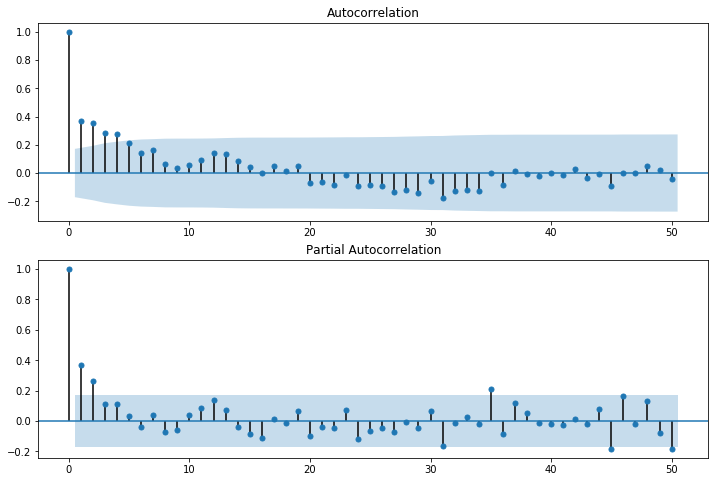

In [31]:
fig, ax = plt.subplots(2,1, figsize= (12,8))
fig = sm.graphics.tsa.plot_acf(ytrain, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(ytrain, lags=50, ax=ax[1])
plt.show()

In [138]:
p = q = [0,1]
d = [1,2]
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
df = pd.DataFrame()

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ytrain,
                                            exog= Xtrain,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            combo = [(param,param_seasonal,results.aic)]
            df = df.append(combo)
        except:
            continue

ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:3561.443611798602
ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:2742.8924198449736
ARIMA(0, 1, 0)x(0, 2, 0, 12) - AIC:3295.0127114320503
ARIMA(0, 1, 0)x(0, 2, 1, 12) - AIC:2491.4951168509206
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:2821.824965583823
ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:2743.2791161742343
ARIMA(0, 1, 0)x(1, 2, 0, 12) - AIC:2570.9947574134803
ARIMA(0, 1, 0)x(1, 2, 1, 12) - AIC:2492.067171984358
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:3045.52243393987
ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:2678.4496552284877
ARIMA(0, 1, 1)x(0, 2, 0, 12) - AIC:2836.5751711435078
ARIMA(0, 1, 1)x(0, 2, 1, 12) - AIC:2446.654269483528
ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:2772.227113062777
ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:2680.3870463674884
ARIMA(0, 1, 1)x(1, 2, 0, 12) - AIC:2535.1876941461906
ARIMA(0, 1, 1)x(1, 2, 1, 12) - AIC:2454.669097603935
ARIMA(0, 2, 0)x(0, 1, 0, 12) - AIC:3653.6582471434076
ARIMA(0, 2, 0)x(0, 1, 1, 12) - AIC:2846.328663064574
ARIMA(0, 2, 0)x(0, 2, 0, 12) - AIC:33

In [139]:
df.columns=['param','param_seasonal','AIC']
df.sort_values('AIC').reset_index(drop=True)

,param,param_seasonal,AIC
0,"(0, 1, 1)","(0, 2, 1, 12)",2446.654269
1,"(1, 1, 1)","(1, 2, 1, 12)",2449.515476
2,"(0, 1, 1)","(1, 2, 1, 12)",2454.669098
3,"(1, 1, 1)","(0, 2, 1, 12)",2455.289641
4,"(1, 2, 1)","(0, 2, 1, 12)",2467.148039
...,...,...,...
59,"(1, 2, 0)","(0, 1, 0, 12)",3157.935659
60,"(0, 1, 0)","(0, 2, 0, 12)",3295.012711
61,"(0, 2, 0)","(0, 2, 0, 12)",3370.908915
62,"(0, 1, 0)","(0, 1, 0, 12)",3561.443612


In [32]:
mod = sm.tsa.statespace.SARIMAX(ytrain,
                                exog= Xtrain,
                                order=(0,1,1),
                                seasonal_order = (0,2,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Sum of Sales   No. Observations:                  131
Model:             SARIMAX(0, 1, 1)x(0, 2, 1, 12)   Log Likelihood               -1212.031
Date:                            Mon, 26 Apr 2021   AIC                           2452.062
Time:                                    14:41:22   BIC                           2487.367
Sample:                                01-01-2008   HQIC                          2466.311
                                     - 11-01-2018                                         
Covariance Type:                              opg                                         
====================================================================================================================================================================
                                                                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------
Super Long-Haul (550+ mi)_freight_m_trucking                                                        61.1777    178.181      0.343      0.731    -288.050     410.405
Change in Total Transp. Emp. (000's)_driver_indicators_m_trucking                                 -946.2954   3376.986     -0.280      0.779   -7565.067    5672.476
Total Class 8, North America_Retail Sales (Ward's)_M/M % Change_indicators_m_trucking_trailer     1080.3281   5844.060      0.185      0.853   -1.04e+04    1.25e+04
Total Trailers, U.S._Production_M/M % Change_indicators_m_trucking_trailer                        -620.9969   5330.029     -0.117      0.907   -1.11e+04    9825.667
Total Classes 4-7, North America_Inventories (Ward's)_M/M % Change_indicators_m_trucking_trailer   348.4342   1.23e+04      0.028      0.977   -2.38e+04    2.45e+04
FTR Truck Loadings_M/M % Change_freight_m_trucking_trailer                                       -3.616e+04   1.08e+05     -0.334      0.739   -2.49e+05    1.76e+05
FTR Rail Intermodal Loadings_M/M % Change_freight_m_trucking_trailer                              -621.1753   1.49e+04     -0.042      0.967   -2.98e+04    2.86e+04
FTR Rail Carloadings (carload + intermodal) (000s, SA)_freight_m_trucking_trailer                   -2.9339    370.281     -0.008      0.994    -728.671     722.803
FTR Rail Carloadings_M/M % Change_freight_m_trucking_trailer                                     -2123.0755    1.9e+04     -0.112      0.911   -3.94e+04    3.52e+04
FTR Cl. 8 Truck Tonnage_M/M % Change_freight_m_trucking_trailer                                   3.845e+04   8.08e+04      0.476      0.634    -1.2e+05    1.97e+05
Change in Distillate Fuel Inventories_x                                                             -0.9172      9.581     -0.096      0.924     -19.696      17.862
ma.L1                                                                                               -0.7411      0.350     -2.117      0.034      -1.427      -0.055
ma.S.L12                                                                                            -1.1682      0.304     -3.837      0.000      -1.765      -0.571
sigma2                                                                                            3.549e+10      0.305   1.16e+11      0.000    3.55e+10    3.55e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.99   Jarque-Bera (JB):                 5.27
Prob(Q):                              0.32   Prob(JB):                         0.07
Heteroskedasticity (H):               1.51   Skew:                          

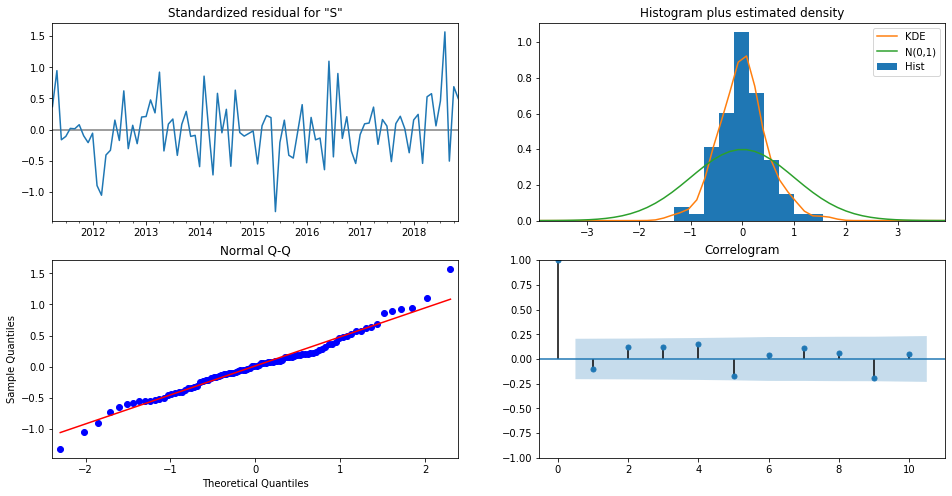

In [33]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

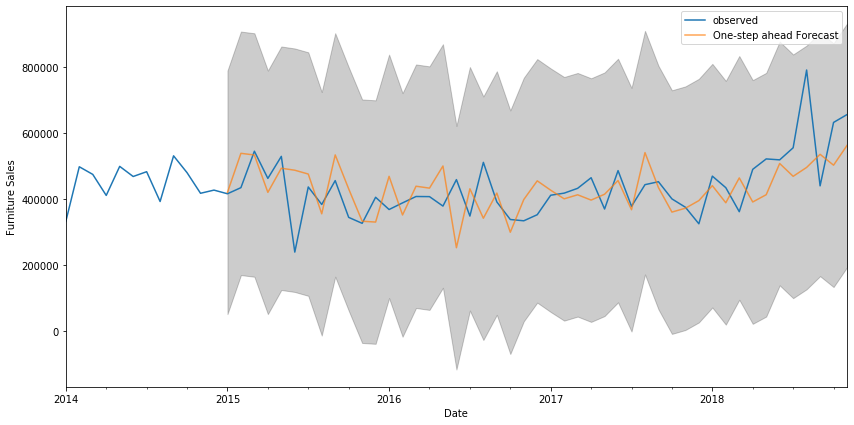

In [34]:
pred = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = ytrain['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

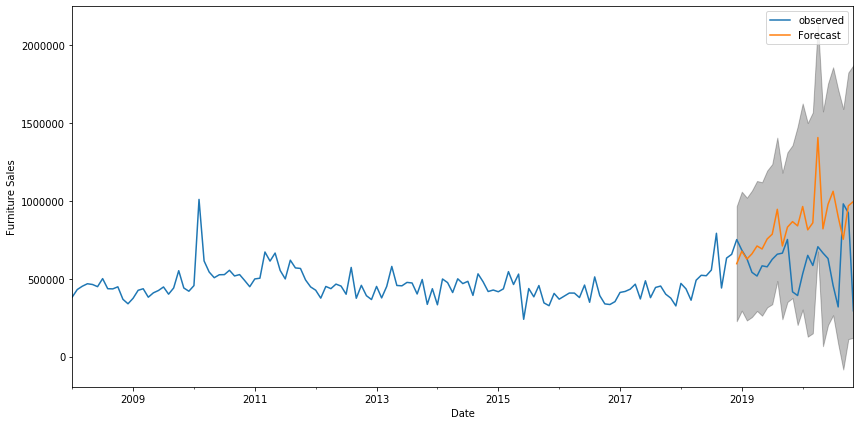

In [35]:
pred_uc = results.get_forecast(steps=24, exog= Xtest)
pred_ci = pred_uc.conf_int()
ax = sales.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [36]:
# For training data
me.evaluate_model(pred.predicted_mean, ytrain['2015':])

			Model Performance

Mean Absolute Percentage Error: 0.16629999141195242

Mean Absolute Error: 70192.01769873122

BIAS: 4280.807080702547

Mean Squared Error: 861289535.3230739

Root Mean Squared Error: 29347.734756247777


In [37]:
# For testing data
me.evaluate_model(pred_uc.predicted_mean,ytest)

			Model Performance

Mean Absolute Percentage Error: 0.5644003046384692

Mean Absolute Error: 269687.2619301987

BIAS: -236975.4580124404

Mean Squared Error: 1347776824804.9417

Root Mean Squared Error: 1160937.9073856368


## AutoArima with exogneous dataset

In [38]:
model = auto_arima(ytrain,
                   X=Xtrain,
                   start_p=0,
                   start_q=0,
                   max_p = 4,
                   max_q = 4,
                   start_P = 0,
                   start_Q = 0,
                   max_P = 4,
                   max_Q =4,
                   d = 1,
                   D = 1,
                   m=12,
                   seasonal= True,
                  trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3590.596, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3096.445, Time=1.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3067.337, Time=1.55 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=3099.063, Time=0.46 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=3069.247, Time=1.97 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=3069.227, Time=5.50 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=3083.519, Time=1.33 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=5.88 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=1.37 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=3068.475, Time=2.03 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=3072.188, Time=1.95 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=3079.719, Time=1.89 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=2.28 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=3083.214, Time=1.69 sec

Best model:  ARIMA(0,1,1)(0,1,1)[

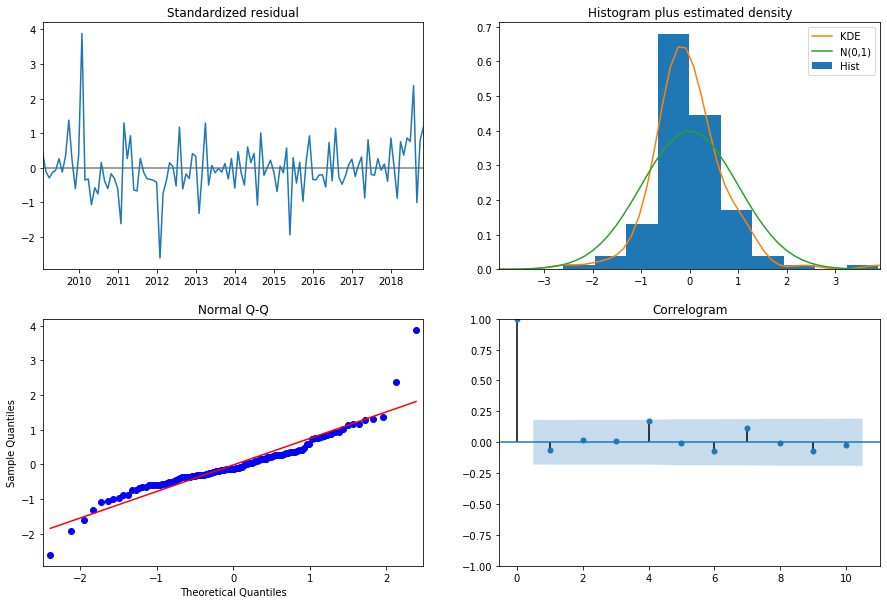

In [39]:
model.plot_diagnostics(figsize=(15,10))
plt.show()

In [40]:
results= pd.DataFrame(model.predict(24, Xtest), index=Xtest.index)
results

,0
2018-12-01,6.002154e+05
2019-01-01,5.608201e+05
2019-02-01,6.300762e+05
2019-03-01,6.812719e+05
2019-04-01,6.659089e+05
2019-05-01,6.595884e+05
2019-06-01,6.279602e+05
2019-07-01,6.585473e+05
2019-08-01,7.236690e+05
2019-09-01,6.312620e+05


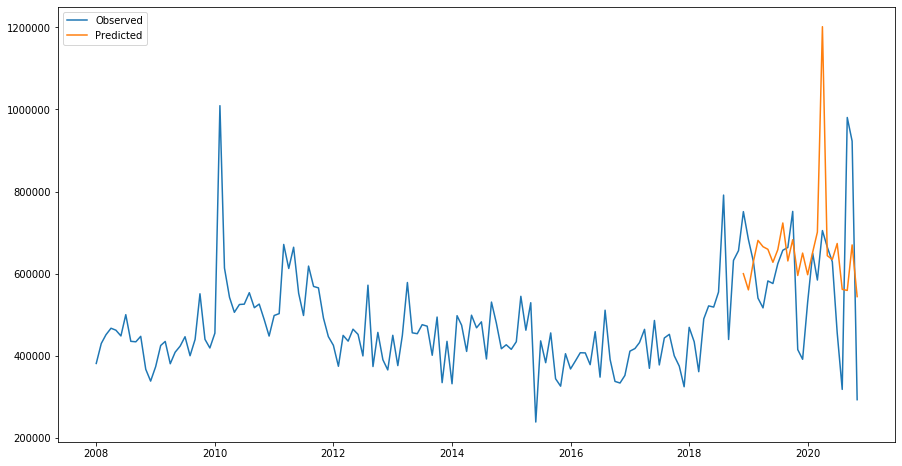

In [41]:
plt.figure(figsize=[15,8])
plt.plot(packaging['Sum of Sales'],label= 'Observed')
plt.plot(results, label='Predicted')
plt.legend()
plt.show()

# Model Evaluation
 - Mean Absolute Percentage Error
 - Mean Absolute Error
 - BIAS
 - Mean Squared Error
 - Root Mean Squared Error

#### Train Set

In [55]:
me.evaluate_model(ytrain,model.predict(131,Xtrain))

			Model Performance

Mean Absolute Percentage Error: 0.41935918790956944

Mean Absolute Error: 349056.125213152

BIAS: 343446.43444804475

Mean Squared Error: 15452164386894.84

Root Mean Squared Error: 3930924.11360164


#### Test Set

In [42]:
me.evaluate_model(ytest,model.predict(24, Xtest))

			Model Performance

Mean Absolute Percentage Error: 0.21582809446518544

Mean Absolute Error: 142837.30366215858

BIAS: 53678.20910851224

Mean Squared Error: 69152403194.33199

Root Mean Squared Error: 262968.44524454256
